<a href="https://colab.research.google.com/github/AshOne91/PLAYDATA-COLAB/blob/main/%EC%9A%94%EA%B5%AC%EC%82%AC%ED%95%AD%2C_%EC%8B%9C%EC%8A%A4%ED%85%9C_%EC%84%A4%EA%B3%84%2C_%EA%B0%9D%EC%B2%B4_%EC%84%A4%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

요구사항
```
"우리가 이 소프트웨어로 무엇을 해야 하는지"를 결정하는 문서
```
유형
```
1.기능요구사항 : 시스템이 어떤 기능을 해야 하는지
2.비기능 요구사항 : 품질이나 제약조건에 대한, 성능,보안,사용성, 확장성
```
요구사항 도출 기법
```
1. 사용자 인터뷰 : AI를 이용한 회의내용 요약 및 키워드 검출
2. UML(Use Case Diagram) : 액터(고객), use case:문서검색,

  - class diagram
  - actor diagram
  - sequence diagram
```
개발 방법론
```
폭포수 : 완료된 단계는 이전단계로 돌아갈수 없다
  계획및 분석->설계->개발->테스트->유지보수
에자일 : 반복적이고 점진적인 개발방법
  계획및 분석->설계->개발->테스트->유지보수 이과정을 작은 단위의 싸이클로 분리해서 반복적으로 진행
  - 칸반, 스크럼,익스트림 프로그래밍
```

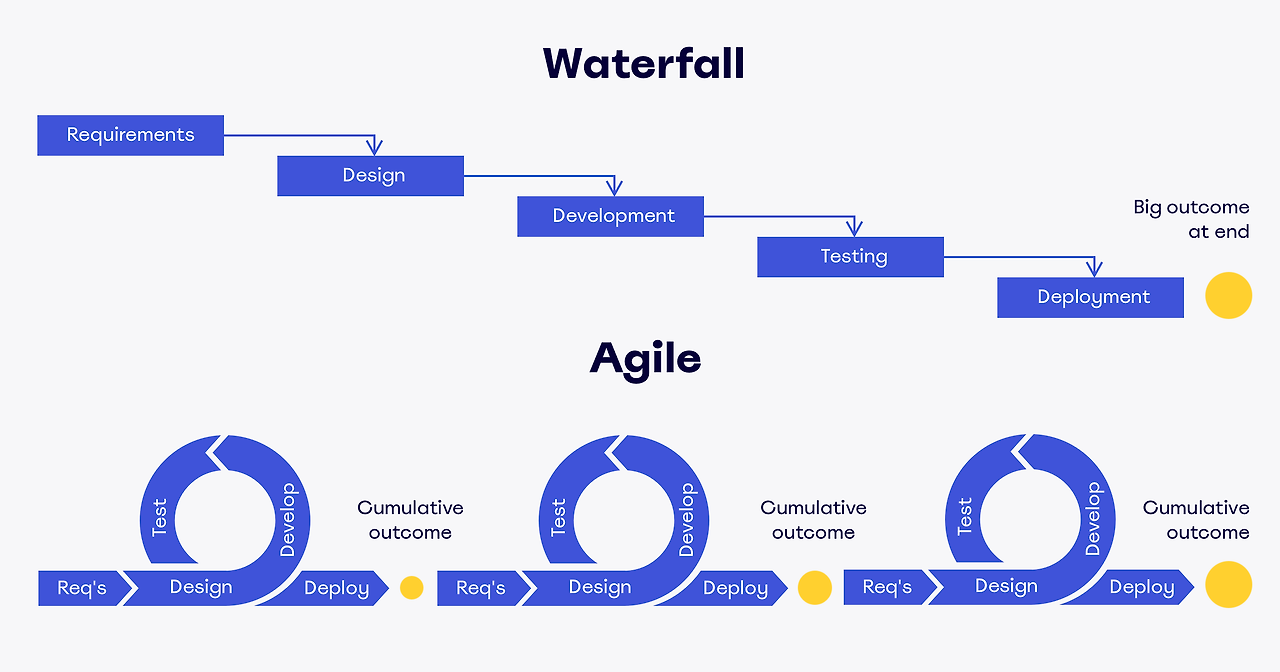

시스템 설계:요구사항을 기반으로 전체 시스템 구조를 설계
```
복잡한 시스템을 하위 시스템으로 나눠 추상화 구조화
```
설계요소
```
계층구조
DB 설계
통신 방식
배포구조(서버, 클라우드)
API 설계(FastAPI)
```
핵심요소
```
클래스(속성과 메서드)
관계: 상속,
OOP 원칙: 캡슐화,상속,다형성,추상화
설계패턴 : Singletone, Factory, 등 --> 디자인패턴
```

Singletone : 하나의 인스턴스만 존재.
```
singletone1 = SingleTone()
singletone2 = SingleTone()
singletone3 = SingleTone()
```

In [ ]:
class Test:
  def __init__(self):
    self.a = 100
  def method(self,a):
    return a

t1 = Test()
t2 = Test()
print(t1 is t2)

False


In [ ]:
# silgeTone 객체
# 클래스 내부에서 객체를 생성해서 리턴방식
class Singleton:
  _instance = None

  def __new__(cls):
      if cls._instance is None:
          cls._instance = super().__new__(cls)  # 객체를 생성해서 클래스변수에 저장
      return cls._instance
s1 = Singleton()
s2 = Singleton()
s1 is s2

True

In [ ]:
# silgeTone 객체는 언제?
# 클래스의 내부가 클래스자체의 인스턴스 변수를사용하지 않는
# 단순히 메소드를 호출하는 경우
# 클래스의 내부 변수가 없는경우 self.변수 형태가 없고.. 변수가 필요하면 클래스변수만 있을때

Factory Method 패턴 - 상속관계
```
객체생성을 서브 클래스에 위임(직접 생성하지 않는다)
객체를 생성하는 공장(factory)메서드를 따로 정의

```

In [ ]:
# 추상화의 개념을 포함
class Animal:    # --> 추상화... 같은계열을 같은 메소드를 갖는다
  def speak(self):
    raise NotImplementedError
class Dog(Animal):
   def speak(self):
    return '멍멍'
class Cat(Animal):
  def speak(self):
    return '야용'

class AnimalFactory:
  def create_animal(self,animal_type):
    if animal_type == 'dog':
      return Dog()
    elif animal_type == 'cat':
      return Cat()
    else:
      raise ValueError(f'지원하지 않는 동물입니다. {animal_type}')
factory = AnimalFactory()
animal = factory.create_animal('dog')
print(animal.speak())

멍멍


Observer 패턴
```
객체상태 변화를 관찰해서 자동으로 다른객체들에 알림을 전달
이벤트기반 시스템에 적합
subject는 observer 리스트를 관리하고 상태변화면 notify()
[subject]
  |
  --add(observer)
  |
  --notify()
      observer.update()

```

In [ ]:
# Observer 객체를 저장하고.. 이벤트가 발행하면 notify메소드를 통해 메세지를 모든 observer 객체에 업데이트한다
class Subject:
  def __init__(self):
    self._observers = []

  def add_observer(self, obs):  # Observer 객체
    self._observers.append(obs)
  def notify(self, message):
    for obs in self._observers:
      obs.update(message)

class Observer:  # 추상화 --> 사용을 위해서는 상속을 받아서 update를 재 정의
  def update(self,message):
    raise NotImplementedError

#사용
class User(Observer):
  def __init__(self,name):
    self.name = name
  def update(self,message):
    print(self.name,'새로운 알림')

subject = Subject()  # 상태 변화를 감지
u1 = User('홍길동')
u2 = User('이순신')

subject.add_observer(u1)
subject.add_observer(u2)

subject.notify('새로운 상품이 출시되었습니다.')

# 이메일 구독
# 모바일에서 푸시알림
# 실시간 데이터 업데이트

홍길동 새로운 알림
이순신 새로운 알림


- 요구사항 분석서
- 기능명세서
- 테스트 계획서(설계서)
- 유지보수 계획서
- WBS
- API 명세서(공공기관 api 문서 )

API 설계절차 (Fast API를 이용해서 python으로 api 사용)
```
  RESTFull 방식 : URL 방식으로 리소스와 경로설계
  1. 요구사항 분석
    회원가입, 게시판 조회, 결제처리
  2. 리소스 정의
    GET / users(유저목록조회)
    POST / users(유저 생성)
    GET / users/{id}  (개별유저 조회)  
```